## Linear Regression
The most basic Machine Learning model. Easy to interpret and very useful. [Here](https://balavenkatesh.medium.com/ten-minutes-to-learn-linear-regression-for-dummies-5469038f4781) is a recommended read about it. <br><br>
These are the main assumptions about the model:

* Independence of the observations - the rows do not depend on each other;
* The relationship between variable and target is linear - if we plot features vs target of the population we'd see something like a line;
* Errors are normally distributed - if we plot the residuals we'd see something like a bell shape;
* No/Little Multicolinearity - no features highly correlated with each other;
* Homoscedasticity of errors - equal variance of the residuals around the regression line;


Linear Regression assumptions explained with example [here](https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b).


In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


The linear model has the formula:
* y = a * X + b
<br>

#### Where:
y is your prediction;<br>
b is the 'intercept': where the regression line crosses the y axis;<br>
a is the 'coeficient': it's what your model will calculate;<br>
X is a value from a columns.

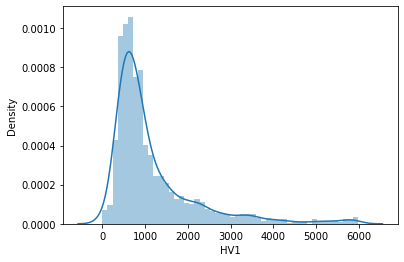

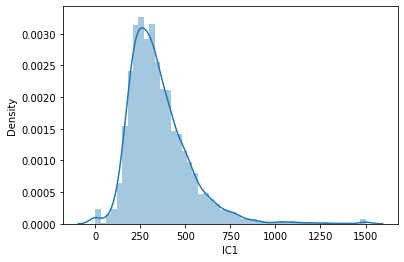

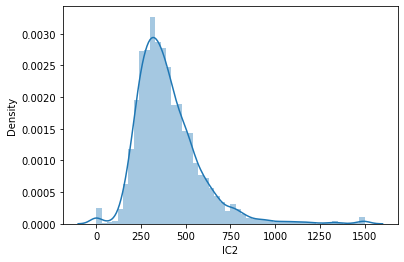

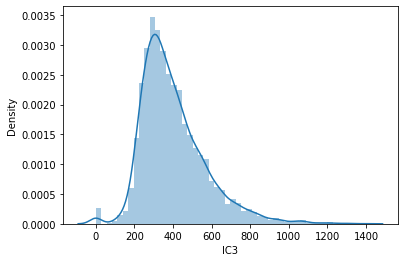

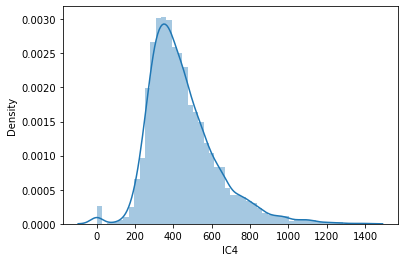

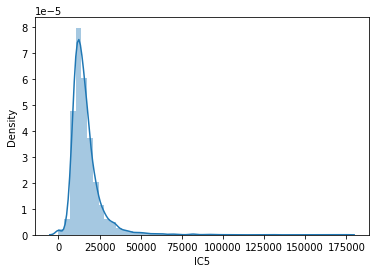

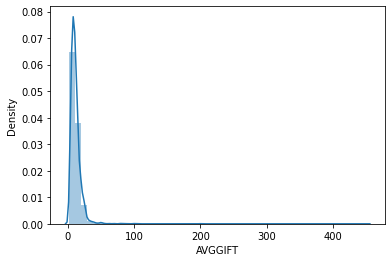

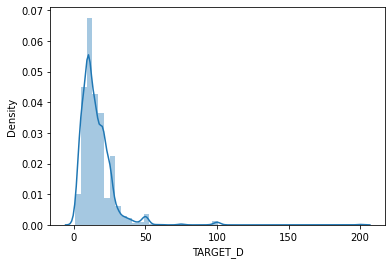

In [38]:
import seaborn as sns

for col in data.columns:
    sns.distplot(data[col])
    plt.show()

In [20]:
X = data.drop(['TARGET_D'], axis=1)
y = data['TARGET_D']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     258.2
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:29:48   Log-Likelihood:                -18313.
No. Observations:                4843   AIC:                         3.664e+04
Df Residuals:                    4835   BIC:                         3.669e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2092      0.503     12.346      0.0

A bit more info on how to interpret table above [here](https://towardsdatascience.com/the-complete-guide-to-linear-regression-analysis-38a421a89dc2).

In [32]:
# sklearn's LR model

X = data.drop(['TARGET_D'], axis=1) # watch out, rookie mistake, don't use your target to train the model
y = data['TARGET_D'] # what you'll want to predict

lm = LinearRegression() # start the model object {'coef': []}
lm.fit(X,y) # fit your regression line / train the model {'coef': [coeficients]}
# lm.coef_ # lm.intercept_

LinearRegression()

In [28]:
# evaluating sklearn's LR model

predictions = lm.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.27
RMSE: 10.616662758427262
MAE: 5.656813756037997


In [6]:
# Analyzing results

# hint: to analyse your results, it might be a good idea to add your predictions to your dataframe

<AxesSubplot:xlabel='IC1', ylabel='TARGET_D'>

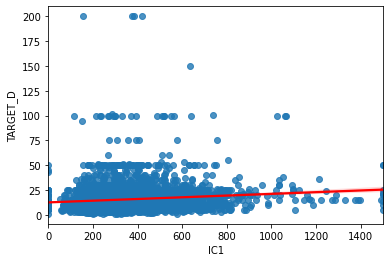

In [7]:
# we can plot the a simple regression line between one feature and the target
# this way we can see visually if the features have some linear correlation with the target
sns.regplot(X['IC1'], y, line_kws={"color": "red"})

In [8]:
# a better way might be by getting an actual measure for correlation
# we can also use it to check multicolinearity
X.corr()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
HV1,1.000000,0.703625,0.739520,0.731628,0.746706,0.737448,0.137374
IC1,0.703625,1.000000,0.952263,0.974436,0.928996,0.811115,0.118425
IC2,0.739520,0.952263,1.000000,0.954477,0.972286,0.875394,0.134469
IC3,0.731628,0.974436,0.954477,1.000000,0.972117,0.829505,0.126843
IC4,0.746706,0.928996,0.972286,0.972117,1.000000,0.868960,0.133909
IC5,0.737448,0.811115,0.875394,0.829505,0.868960,1.000000,0.135712
AVGGIFT,0.137374,0.118425,0.134469,0.126843,0.133909,0.135712,1.000000


OBS: We say there is multicolinearity when two or more features are highly correlated with each other. For better results in Linear Regression it is ideal that the features have no correlation between each other, but are correlated with the target variable.

<AxesSubplot:xlabel='TARGET_D', ylabel='Density'>

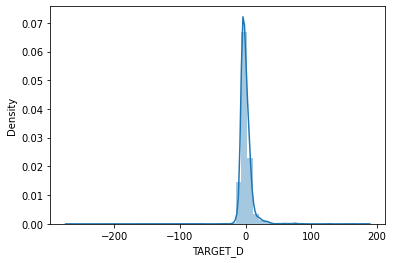

In [9]:
# residuals = the error of each prediction
residuals = y - predictions

# let's check if the residuals are normally distributed
sns.distplot(residuals)

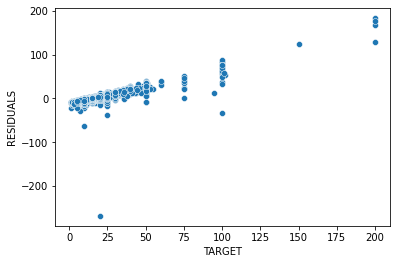

In [10]:
# we can check for homoscedasticity

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='TARGET', ylabel='RESIDUALS')
plt.show()

# here the variance of the errors is far from constant, so homoscedasticity is compromised

From the above plot we can infer that the higher the amount donated the bigger the error. Probably because we have very few observations with high value donations. We can analyze the outliers, interpret and decide how to deal with them.